In [1]:
import pandas as pd
import numpy as np
from scipy.stats import kruskal
import scikit_posthocs as sp
import matplotlib.pyplot as plt
import seaborn as sns
from utils.visulize import plot_grouped_bar_with_ci
from utils.grouping import get_group_labels

In [2]:
# load data
df = pd.read_csv('./summary_results_new.csv')
dataset_name = "ALL"  # Change to 'CF', 'CON', etc., for other comparisons
df = df[df['dataset'] == dataset_name].copy()

# ensure df has 240 rows excluding the title row
assert df.shape[0] == 240, f"Expected 240 rows, but got {df.shape[0]} rows."

In [3]:
print(df.columns)
metric_names = ['accuracy', 'f1_score', 'precision', 'recall', 'roc_auc']
models = df['model'].unique()

Index(['dataset', 'seed', 'model', 'accuracy', 'f1_score', 'precision',
       'recall', 'roc_auc'],
      dtype='object')



===== ACCURACY =====
Kruskal-Wallis: H = 148.767, p = 7.37e-29

Post-hoc Dunn’s test (Holm-corrected):
                  logistic      lstm lstm-features   lstmfcn lstmfcn-features  \
logistic            1.0000  9.18e-07        0.7275    1.0000           1.0000   
lstm              9.18e-07    1.0000        0.0026    0.0001         5.98e-08   
lstm-features       0.7275    0.0026        1.0000    1.0000           0.3170   
lstmfcn             1.0000    0.0001        1.0000    1.0000           1.0000   
lstmfcn-features    1.0000  5.98e-08        0.3170    1.0000           1.0000   
randomforest        0.1641  4.62e-14        0.0005    0.0080           0.4563   
svm                 1.0000  3.78e-07        0.5731    1.0000           1.0000   
vivit             1.08e-07  2.79e-28      1.15e-12  2.19e-10         1.56e-06   

                 randomforest       svm     vivit  
logistic               0.1641    1.0000  1.08e-07  
lstm                 4.62e-14  3.78e-07  2.79e-28  
lstm-featu

C:\Users\Mud\AppData\Local\Temp\ipykernel_41560\841854759.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(posthoc.applymap(fmt_p))
C:\Users\Mud\AppData\Local\Temp\ipykernel_41560\841854759.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(posthoc.applymap(fmt_p))
C:\Users\Mud\AppData\Local\Temp\ipykernel_41560\841854759.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(posthoc.applymap(fmt_p))



===== RECALL =====
Kruskal-Wallis: H = 147.021, p = 1.71e-28

Post-hoc Dunn’s test (Holm-corrected):
                  logistic      lstm lstm-features   lstmfcn lstmfcn-features  \
logistic            1.0000    0.0403        1.0000    1.0000           1.0000   
lstm                0.0403    1.0000        0.7144    0.1801           0.6604   
lstm-features       1.0000    0.7144        1.0000    1.0000           1.0000   
lstmfcn             1.0000    0.1801        1.0000    1.0000           1.0000   
lstmfcn-features    1.0000    0.6604        1.0000    1.0000           1.0000   
randomforest      2.07e-05  9.91e-14      4.87e-08  1.43e-06         6.74e-08   
svm               1.33e-09  3.61e-20      4.60e-13  3.91e-11         7.55e-13   
vivit               1.0000    0.0046        0.8916    1.0000           0.9198   

                 randomforest       svm     vivit  
logistic             2.07e-05  1.33e-09    1.0000  
lstm                 9.91e-14  3.61e-20    0.0046  
lstm-feature

C:\Users\Mud\AppData\Local\Temp\ipykernel_41560\841854759.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(posthoc.applymap(fmt_p))
C:\Users\Mud\AppData\Local\Temp\ipykernel_41560\841854759.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(posthoc.applymap(fmt_p))


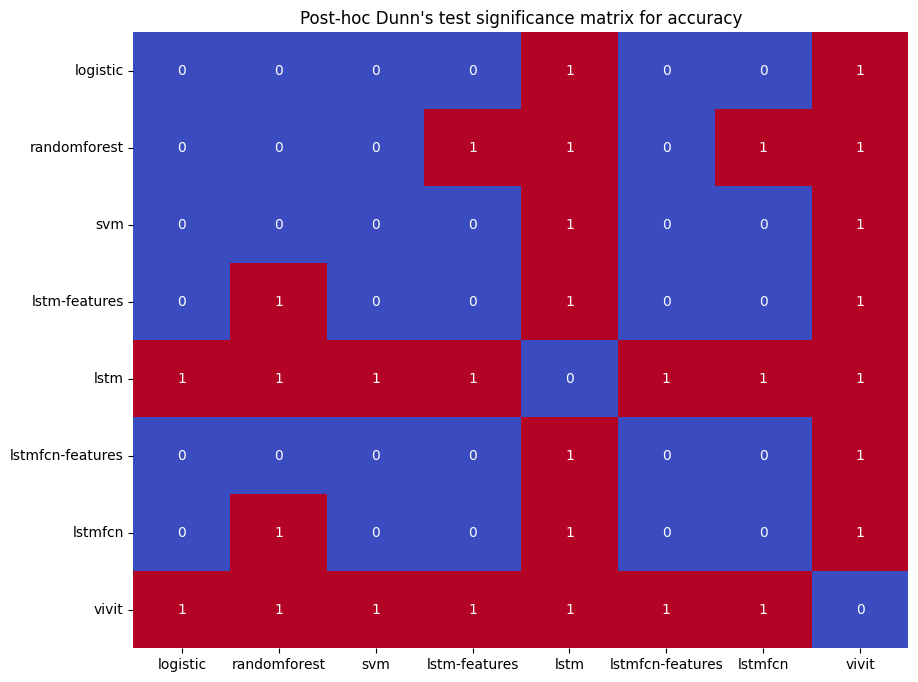

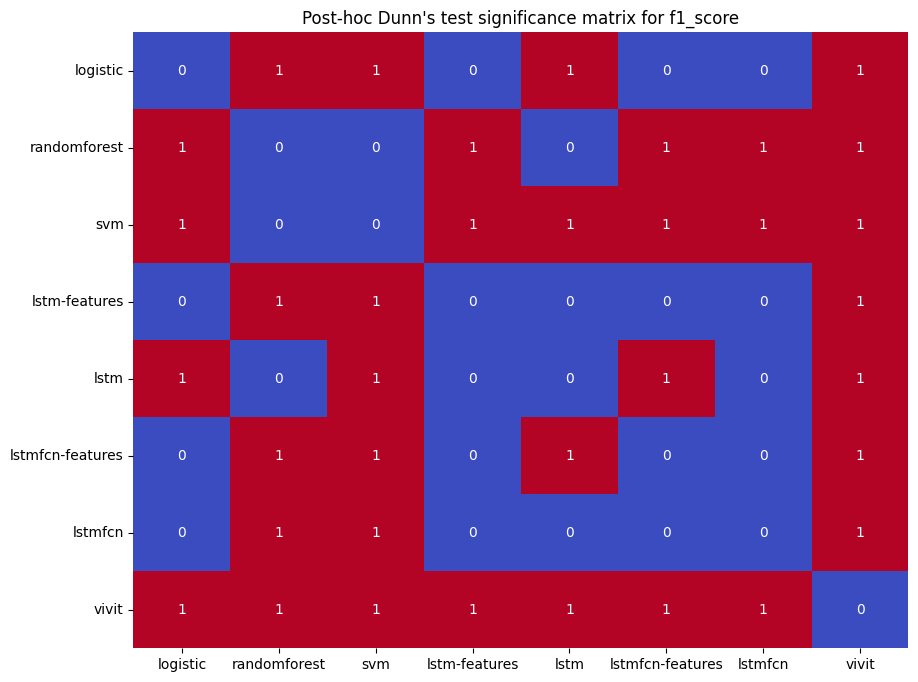

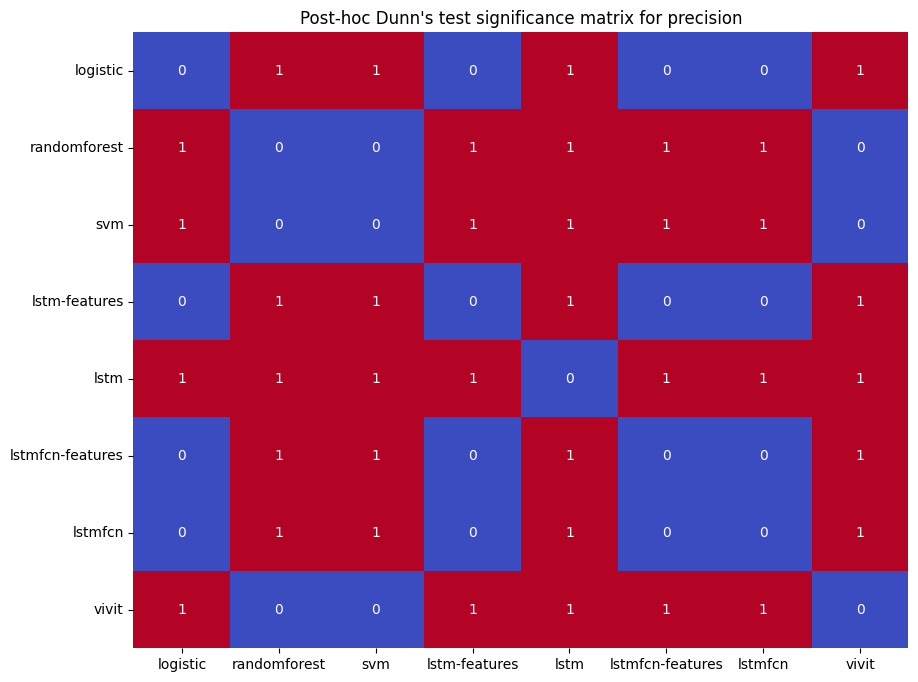

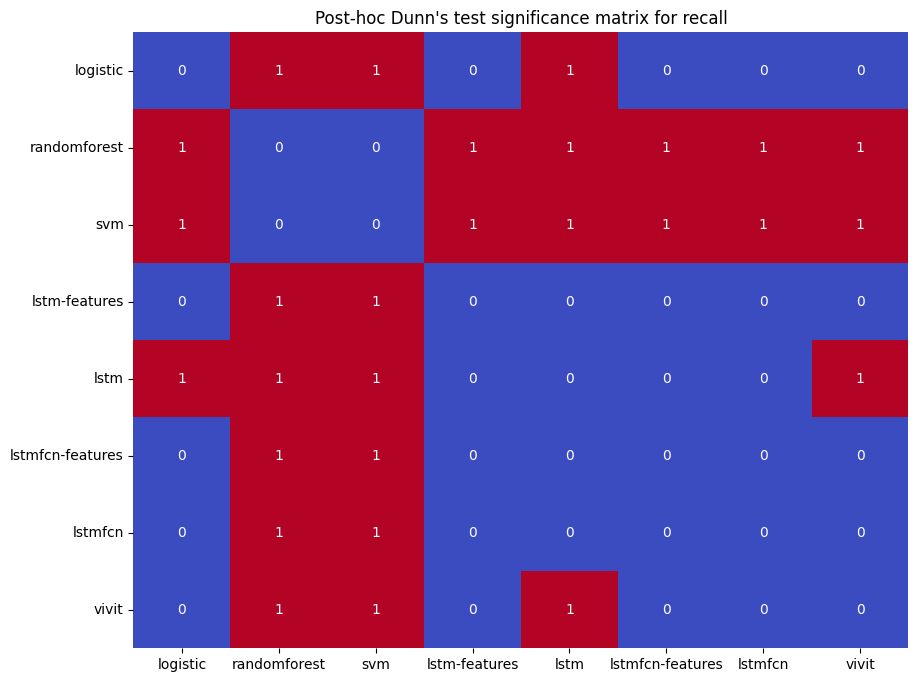

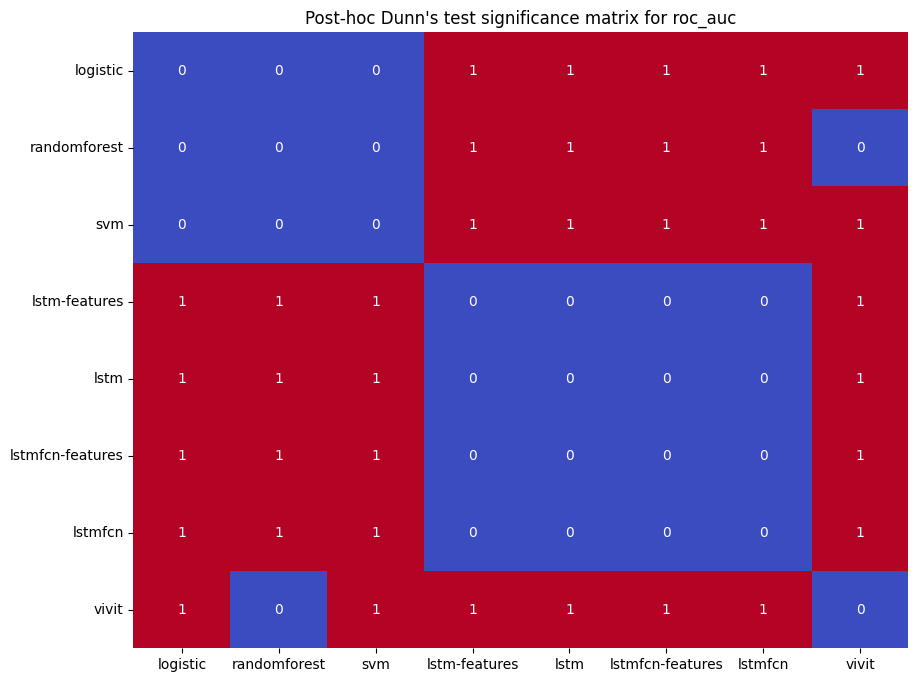

In [4]:
# Run analysis per metric
def fmt_p(x):
    return f"{x:.4f}" if x >= 1e-4 else f"{x:.2e}"

posthoc_results = {}
for metric in metric_names:
    print(f"\n===== {metric.upper()} =====")
    data_by_model = [df[df['model'] == m][metric] for m in models]

    # Kruskal-Wallis test
    H, p = kruskal(*data_by_model)
    print(f"Kruskal-Wallis: H = {H:.3f}, p = {fmt_p(p)}")
    
    # Post-hoc test if significant
    if p < 0.05:
        posthoc = sp.posthoc_dunn(df, val_col=metric, group_col='model', p_adjust='holm')
        posthoc_results[metric] = posthoc
        print("\nPost-hoc Dunn’s test (Holm-corrected):")
        print(posthoc.applymap(fmt_p))

        sig_plot = posthoc.apply(lambda x: x < 0.05).astype(int)
        # Plotting the significance matrix
        plt.figure(figsize=(10, 8))
        sns.heatmap(sig_plot.loc[models, models], annot=True, cmap='coolwarm', cbar=False)
        plt.title(f"Post-hoc Dunn's test significance matrix for {metric}")
    else:
        print("No statistically significant difference among models.")


In [5]:
group_labels_per_metric = get_group_labels(posthoc_results, alpha=0.05)
print(group_labels_per_metric)


{'accuracy': {'logistic': 'A', 'lstm-features': 'A', 'lstmfcn': 'A', 'lstmfcn-features': 'A', 'svm': 'A', 'randomforest': 'B', 'vivit': 'C', 'lstm': 'D'}, 'f1_score': {'logistic': 'A', 'lstm-features': 'A', 'lstmfcn': 'A', 'lstmfcn-features': 'A', 'lstm': 'B', 'randomforest': 'C', 'svm': 'C', 'vivit': 'D'}, 'precision': {'logistic': 'A', 'lstm-features': 'A', 'lstmfcn': 'A', 'lstmfcn-features': 'A', 'randomforest': 'B', 'svm': 'B', 'vivit': 'B', 'lstm': 'C'}, 'recall': {'logistic': 'A', 'lstm-features': 'A', 'lstmfcn': 'A', 'lstmfcn-features': 'A', 'vivit': 'A', 'lstm': 'B', 'randomforest': 'C', 'svm': 'C'}, 'roc_auc': {'lstm': 'A', 'lstm-features': 'A', 'lstmfcn': 'A', 'lstmfcn-features': 'A', 'logistic': 'B', 'randomforest': 'B', 'svm': 'B', 'vivit': 'C'}}


Model: logistic, Metric: accuracy, Mean: 0.721190476190476, CI: [0.7198214285714286, 0.722559523809524]
Model: randomforest, Metric: accuracy, Mean: 0.7135714285714285, CI: [0.7104761904761905, 0.7167872023809526]
Model: svm, Metric: accuracy, Mean: 0.7207738095238094, CI: [0.718986607142857, 0.7222619047619047]
Model: lstm, Metric: accuracy, Mean: 0.7347619047619048, CI: [0.7332738095238097, 0.7361904761904761]
Model: lstm-features, Metric: accuracy, Mean: 0.7249999999999999, CI: [0.7223199404761904, 0.7279166666666668]
Model: lstmfcn, Metric: accuracy, Mean: 0.7229166666666668, CI: [0.7210714285714286, 0.7246428571428573]
Model: lstmfcn-features, Metric: accuracy, Mean: 0.7198809523809524, CI: [0.7175595238095238, 0.7222633928571429]
Model: vivit, Metric: accuracy, Mean: 0.6914285714285715, CI: [0.6867842261904762, 0.6955357142857143]
Model: logistic, Metric: f1_score, Mean: 0.7325935615740903, CI: [0.7307563021857156, 0.7342481703526116]
Model: randomforest, Metric: f1_score, Mean: 

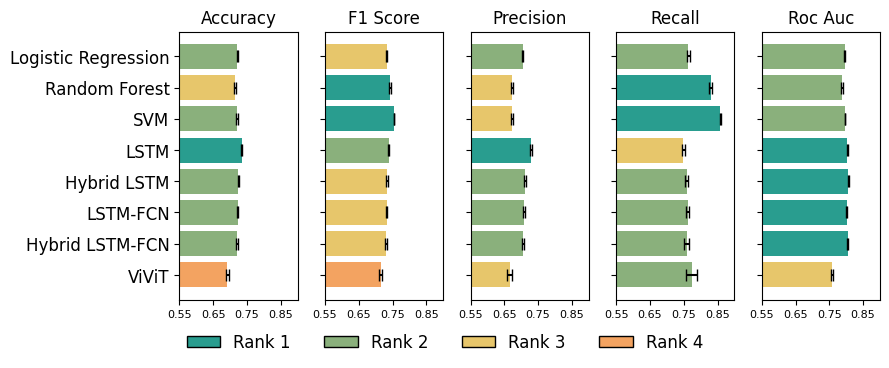

In [6]:
plot_grouped_bar_with_ci(models, df, group_labels_per_metric)

In [7]:
# change the col and row names to these model names
model_names = {
    'logistic': 'Logistic Regression',
    'randomforest': 'Random Forest',
    'svm': 'SVM',
    'lstm-features': 'Hybrid LSTM',
    'lstm': 'LSTM',
    'lstmfcn-features': 'Hybrid LSTM-FCN',
    'lstmfcn': 'LSTM-FCN',
    'vivit': 'ViVit',
}
# set the ordering for the col and row names
model_order = [
    'logistic',
    'randomforest',
    'svm',
    'lstm',
    'lstm-features',
    'lstmfcn',
    'lstmfcn-features',
    'vivit',
]

# for all values in posthoc_results, only remain 3 digits
# e.g. 0.123456 -> 0.123; 1.0 -> 1.00; 0.01123121e-05 -> 0.01e-05； 1 -> 1.00
# store each metric's posthoc result to a csv file
def fmt_three_digits(x):
    # Leave non-numerics (e.g., "ns", "-") alone
    if isinstance(x, (np.integer, int, np.floating, float)):
        s = f"{float(x):.3g}"  # 3 significant digits; uses sci-notation when appropriate
        # If not scientific and no decimal point, pad to .00 (e.g., 1 -> 1.00)
        if 'e' not in s and '.' not in s:
            s = s + '.00'
        return s
    return x


for metric, df in posthoc_results.items():
    # 1) format numbers
    df = df.applymap(fmt_three_digits)

    # 2) rename rows/cols to pretty names
    df = df.rename(index=model_names, columns=model_names)

    # 3) order rows/cols safely (keep only those present)
    desired_idx = [model_names[m] for m in model_order if model_names.get(m) in df.index]
    desired_cols = [model_names[m] for m in model_order if model_names.get(m) in df.columns]
    df = df.loc[desired_idx, desired_cols]

    # 4) save
    df.to_csv(f'./tables/posthoc_dunn_{dataset_name}_{metric}.csv')

C:\Users\Mud\AppData\Local\Temp\ipykernel_41560\631486915.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(fmt_three_digits)
C:\Users\Mud\AppData\Local\Temp\ipykernel_41560\631486915.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(fmt_three_digits)
C:\Users\Mud\AppData\Local\Temp\ipykernel_41560\631486915.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(fmt_three_digits)
C:\Users\Mud\AppData\Local\Temp\ipykernel_41560\631486915.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(fmt_three_digits)
C:\Users\Mud\AppData\Local\Temp\ipykernel_41560\631486915.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(fmt_three_digits)
